# Modeling Global Warming
## Introduction

President-elect Donald Trump said in 2012 that he believed climate change was a hoax created by China. In this pset, we will attempt to prove him wrong. We will use regression analysis to model the climate of different areas in the United States in order to find evidence of global warming.

First, you will create models to analyze and visualize climate change in terms of temperature, and then consider ways to make the data less noisy and obtain clearer temperature change trends.
You will then test your models to see how well historical data can predict future temperatures.
Lastly, you will investigate a way to model the extremity of temperature, rather than just the increasing temperature.

Importing climate class to obtain data from the csv file.
Setting year intervals and cities.



In [13]:
import newps5
import pylab
import re
import numpy 

import warnings
warnings.simplefilter('ignore', numpy.exceptions.RankWarning)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Importing climate class to obtain data from the csv file.
Setting year intervals and cities.



In [14]:
climate = newps5.Climate('./data.csv')
training_interval = pylab.array(range(1961, 2010))
testing_interval = range(2010, 2016)
CITIES = [
        'BOSTON',
        'SEATTLE',
        'SAN DIEGO',
        'PHILADELPHIA',
        'PHOENIX',
        'LAS VEGAS',
        'CHARLOTTE',
        'DALLAS',
        'BALTIMORE',
        'SAN JUAN',
        'LOS ANGELES',
        'MIAMI',
        'NEW ORLEANS',
        'ALBUQUERQUE',
        'PORTLAND',
        'SAN FRANCISCO',
        'TAMPA',
        'NEW YORK',
        'DETROIT',
        'ST LOUIS',
        'CHICAGO'
]

### Part A.4.1
1. Each sample (data point) should be a year from 1961 to
2009 (i.e., the years in TRAINING_INTERVAL) and the temperature on January 10th for New
York City in that year.

2. Next, fit your data to a degree-one polynomial with generate_models, and plot the
regression results using evaluate_models_on_training .

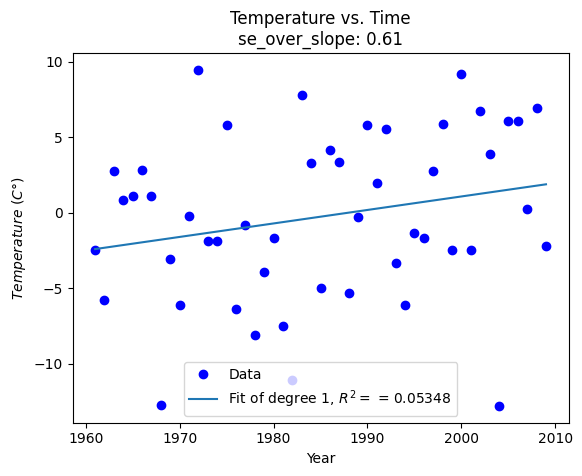

In [15]:
# 1. Generate Data
sample = pylab.array([climate.get_daily_temp('NEW YORK', 1, 10, year) for year in training_interval])
   
# 2. Fitting data to a degree-one polynomial
models = newps5.generate_models(training_interval, sample, [1])
# 3. Evalute linear model
newps5.evaluate_models_on_training(training_interval, sample, models, [1])

### Part A.4.2
1. Each sample (data point) should be a year from 1961 to
2009 (i.e., the years in TRAINING_INTERVAL ) and the average temperature in New York City
for that year.
2. Next, fit your data to a degree-one polynomial with generate_models and plot the regression
results with evaluate_models_on_training.

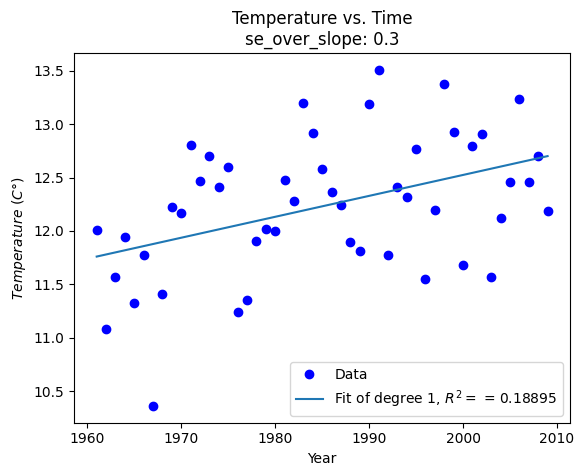

In [16]:
# 1. Generate Data
sample = pylab.array([pylab.average(climate.get_yearly_temp('NEW YORK', year)) for year in training_interval])
# 2. Fitting data to a degree-one polynomial
models = newps5.generate_models(training_interval, sample, [1])
# 3. Evalute linear model
newps5.evaluate_models_on_training(training_interval, sample, models, [1])

##### What difference does choosing a specific day to plot the data for versus calculating the yearly average have on our graphs (i.e., in terms of the R_squared values and the fit of the resulting curves)? Interpret the results.
   
    The second graph (calculating the yearly average) gives us a wider picture about the temperatures behavior.
    Our fit for the model increases while the graph reduces just a little of it's variability.

##### Why do you think these graphs are so noisy? Which one is more noisy?
   
    Noisness must be a consequence of a small sample amount. In the first case we had 1 day and then 365, but that is still not a big number.

##### How do these graphs support or contradict the claim that global warming is leading to an increase in temperature?
   
    We can't see clearly yet the direction but if you look at the r_squared, you notice that it tends to get better with a wider picture.
    Let's work on that.

### Part B: Incorporating More Data
#### Let’s see whether we can get a better picture of climate change by using data from more than just one city.
1. Get the yearly average temperature over multiple cities.
2.  fit your data to a degree-one polynomial with generate_models and plot the regression results with evaluate_models_on_training.


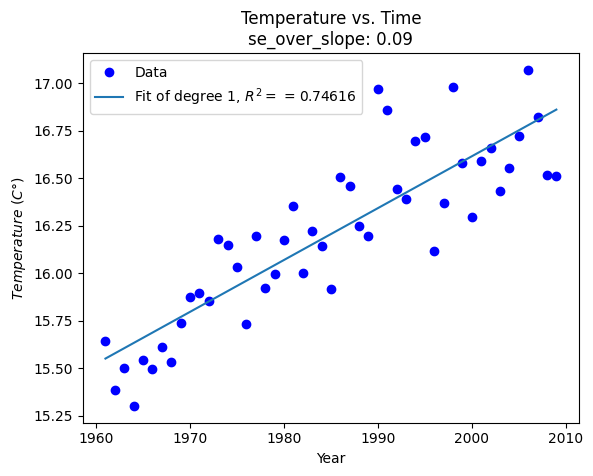

In [17]:
# 1. Generate Data
national_yearly_temp = newps5.gen_cities_avg(climate, CITIES, training_interval)
# 2. Fitting Data to a degree-one polynomial
models = newps5.generate_models(training_interval, national_yearly_temp, [1])
# 3. Evaluate linear model
newps5.evaluate_models_on_training(training_interval, national_yearly_temp, models, [1])

##### How does this graph compare to the graphs from part A (i.e., in terms of the R_squared values, the fit of the resulting curves, and whether the graph supports/contradicts our claim about global warming)? Interpret the results.
    Now we have a wider picture and r_squared is significantly better, showing a better fit. This supports our claim about global warming.
    It is likely that collecting data from multiple cities rather than 1 city reduces variability of the data and therefore nosiness.

##### How would we expect the results to differ if we used 3 different cities? What about 100 different cities?
    For 3 cities I anticipate a graph with much more noise rather than one with 100 different cities.
    Now, I am not suggesting a relationship between amount of cities and variability, it was the case before when we were comparing 1 with 21, but with 100 and 1000 values for example, I would expect a different behavior, one that we will have to test.


### Part C.1
    We are now going to generate the temperatures for samples by taking a moving average over 5 years of data. Therefore, I implemented a cumulated moving avg function that smooths the trend of the values.
1. Use this function on the national yearly temperatures from 1961-2009 in order to generate the moving average temperatures with a window size of 5.
2. Then, fit the (year, moving average) samples a to a degree-one polynomial with g enerate_models, and plot the regression results with evaluate_models_on_training.

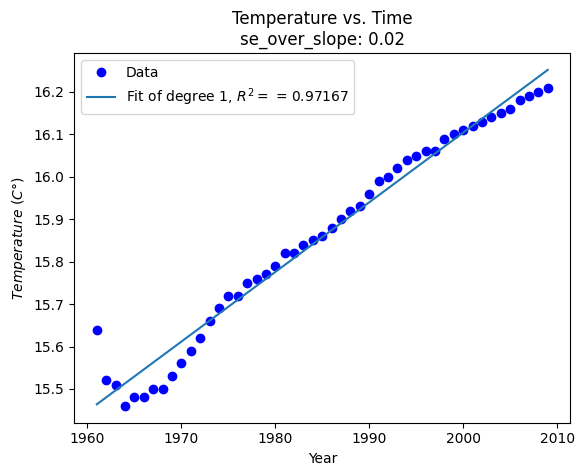

In [18]:
# 1. Generate Data
national_yearly_temp = newps5.gen_cities_avg(climate, CITIES, training_interval)
sample = newps5.moving_average(national_yearly_temp, 5)
# 2. Fitting Data to a degree-one polynomial
models = newps5.generate_models(training_interval, sample, [1])
# 3. Evaluate linear model
newps5.evaluate_models_on_training(training_interval, sample, models, [1])

##### How does this graph compare to the graphs from part A and B ( i.e., in terms of the R_squared values, the fit of the resulting curves, and whether the graph supports/contradicts our claim about global warming)? Interpret the results.
    The r_squared value has increased by 31% since graph B.(Much better fit)
    The graph still supports our claim about global warming.
##### Why do you think this is the case?
    Moving averages can smooth time series data and reveal underlying trends. We could say we were expecting this behavior since grah B.

### Part C.2: Generate more models
1. Compute 5-year moving averages of the national yearly temperature from 1961-2009 as your training data samples.
2. Then, fit the (year, moving average) samples a to polynomials of degree 1, 2 and 20 with generate_models, and plot the regression results with evaluate_models_on_training.

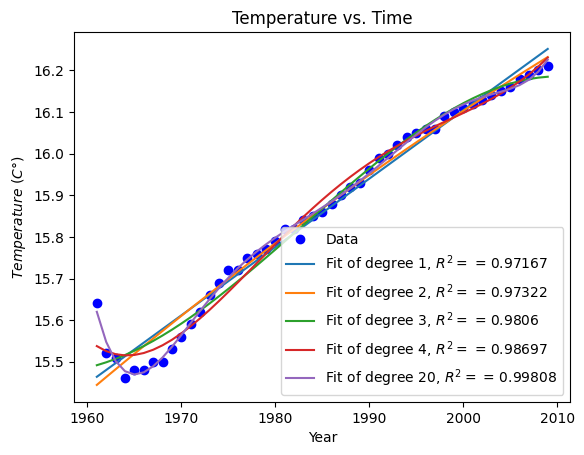

In [19]:
# 1. Generate Data
national_yearly_temp = newps5.gen_cities_avg(climate, CITIES, training_interval)
sample = newps5.moving_average(national_yearly_temp, 5)
# 2. Fitting Data to 1, 2 and 20 degree polynomial
models = newps5.generate_models(training_interval, sample, [1,2,3,4, 20])
# 3. Evaluate Models
newps5.evaluate_models_on_training(training_interval, sample, models, [1,2,3,4, 20], False)

##### How do these models compare to each other?
    They fit the graph better each time but that doesn't necessarily mean we should keep with the highest degree. We may be overfitting data.
    Let's prove that.

### Part C.3: Good or Bad Models
    I created a new interval by stretching the amount of years so we have a clear view of what's going on over time. Then I implemented the function random_dist showed in Lecture 10 to test the models.
    This function generates 10 random distributions of the sample, each distribution creates models with one portion of data and test them with the remaining data in the other portion.

In [20]:
new_interval = range(1961, 2016)
national_yearly_temp = newps5.gen_cities_avg(climate, CITIES, new_interval)
newps5.random_dist(new_interval, national_yearly_temp)

Mean R-squares for test data
For dimensionality 1 mean = 0.7381 Std = 0.0723
For dimensionality 2 mean = 0.7336 Std = 0.0743
For dimensionality 3 mean = 0.7243 Std = 0.0711
For dimensionality 4 mean = 0.6944 Std = 0.0757
For dimensionality 20 mean = -0.1553 Std = 2.0329
For dimensionality 30 mean = -0.3177 Std = 2.2449


    This is just what I was looking for. A 20 degree polynomial was overfitting data and this gives us a more accurate representation of that.
    The linear model seems to be the best one with the quadratic one, their r_squared is good enough, their std's seems to be the lowest ones and both of them are simple models.

### Part D: Modeling Extreme Temperatures
    We can model this effect by measuring the standard deviation in our data. A small standard deviation would suggest that the data is very close together around the mean. A larger standard deviation, however, would suggest that the data varies a lot (i.e., more extreme weather).
    
1. Use this function on the national yearly temperatures from 1961-2009 in order to generate the moving average temperatures with a window size of 5.
2. Then, fit the (year, moving average) samples a to a degree-one polynomial with g enerate_models, and plot the regression results with evaluate_models_on_training.

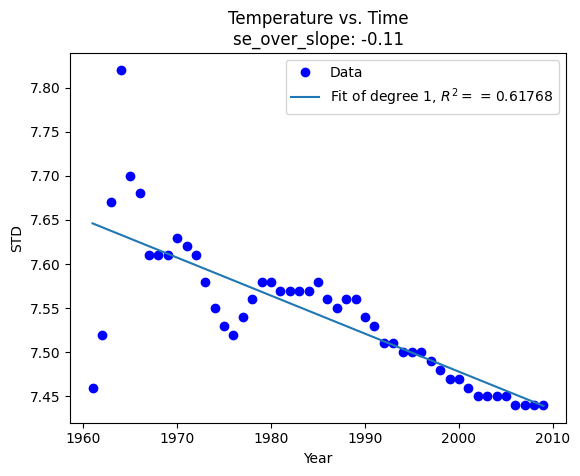

In [21]:
# 1. Generate Data
national_yearly_temp_std = newps5.gen_std_devs(climate, CITIES, training_interval)
sample = newps5.moving_average(national_yearly_temp_std, 5)
# 2. Fitting data
models = newps5.generate_models(training_interval, sample, [1])
# 3. Evaluate Models
newps5.evaluate_models_on_training(training_interval, sample, models, [1], yLabel = True)
    

##### Does the result match our claim (i.e., temperature variation is getting larger over these years)?
    We didn't get what we expected here, temperature variation is not getting larger, however, we saw that an increase in the temperature is actually happening.
    To improve it, we could define what is a extreme temperature within a range of values, count them, an determine it's variability over the years.
    Let's try it.
    

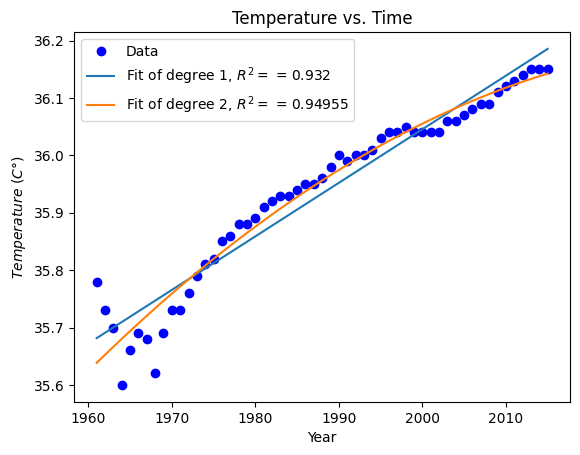

In [23]:
# 1. Generate Data
# gen_hot_temp returns the mean of daily values >= 35 degrees for the 21 cities listed over the years
national_yearly_temp_std = newps5.gen_hot_temp(climate, CITIES, new_interval)
sample = newps5.moving_average(national_yearly_temp_std, 5)
# 2. Fitting data
models = newps5.generate_models(new_interval, sample, [1,2])
# 3. Evaluate Models
newps5.evaluate_models_on_training(new_interval, sample, models, [1,2], False)

##### Now we can prove Donald Trump was wrong about it. After modeling extreme temperature values, the relationship can be expressed either as linear or quadratic.